<a href="https://colab.research.google.com/github/venkatareddykonasani/Python_For_Data_Science/blob/main/Session2_Data_manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session2- Data Manipulation with Pandas

## Table of Contents

1. Creating Dataframes // Importing data as dataframe
2. Some basic checks and datatypes
3. Indexing/ sampling
4. Conditional Filtering
5. Subsetting || Updating Row/ Columns || Add/Remove
6. Sorting || Gropuby / Aggregation



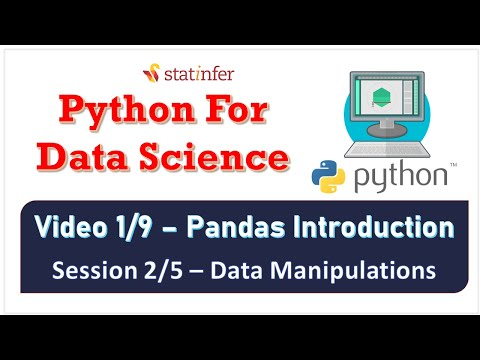

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('0JvtozJQw5I', width=500, height=300)
# https://youtu.be/0JvtozJQw5I 

# 1.What is Pandas?

A python library for Data Analysis and Data Manipulation. It makes working with tabular data very easy.

Pandas has two main data objects:
1. Series : one-dimentional indexed array
2. DataFrame : two-dimentional indexed array; a table like structure; can be though of parallally stacked Series; in dataframe every column is a pandas series.

In this Session we shall only cover Pandas DataFrame in details.



### Creating a DataFrame

1. Data Frames are table like structures.
2. Each column contains measurements on one variable.
3. Each row contains one case or one observation for each column.


* follows Dictionary like structure.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#PATH = "/content/drive/My Drive/2020 Statinfer Course/Part1 Python For ML/Intermediate Python/project2 datasets/"

Use datasets from git-hub. You can ignore the google drive path

https://github.com/venkatareddykonasani/Datasets/tree/master/Python_Session2_Datasets

In [ ]:
import numpy as np # it's a good idea to import and check if we have numpy too as pandas is based on numpy
import pandas as pd

As said earlier, at the core dataframes are dictionaries disguised as 2d arrays, let's turn a dictionary in to a pandas dataframe.

In [ ]:
# creating panda data frame from dictionary
data = {'name': ['Stan', 'Kyle', 'Eric', 'Kenny'],
        'age': [9, 9, 11, 10]}
df = pd.DataFrame(data)
df

Notice one extra column without any name at the begining? This is the index column. Index helps us accessing any row and even subsetting  the dataframe.

### Importing datasets as DataFrame


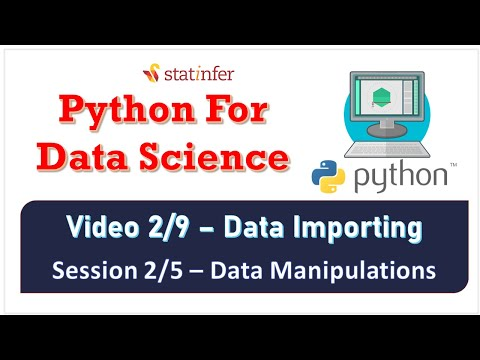

In [ ]:
YouTubeVideo('8HNINvxAhpc', width=500, height=300)
# https://youtu.be/8HNINvxAhpc 

1. importing Excel sheets

In [ ]:
#excel sheet
wb_data = pd.read_excel("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Python_Session2_Datasets/World_Bank_Data/World_Bank_Indicators.xlsx" , # location and name of file
                        sheet_name = "Data by country", # sheet tab name
                        )
wb_data

In [ ]:
wb_data.head(10) # here we are using .head() to see just first 5 obeservations.

In [ ]:
wb_data.head().T

### Importing CSV files
Most of the time the external data will be provided in form of a csv file.


* From here we'll start our data manipulation with pandas project.
* we are going to work with the famous `titanic` dataset to explore the capabilites of the pandas.

In [ ]:
#let's import the 'train.csv' as our dataframe:
titanic = pd.read_csv('https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Python_Session2_Datasets/titanic/train.csv')

In [ ]:
# the object type of titanic
type(titanic)

# 2.Basics of Pandas
Basic Checks after importing
1. Is the data imported correctly? 
2. Are the variables imported in right format? 
3. Just printing the data is not always a good option. 
4. It is a good practice to check the number of rows, columns, quick look at the variable structures, a summary and data snapshot.

5. Most importantly we want to get a feel about, with what kind of data are we working?

In [ ]:
# looking at first few observations
titanic.head()
# titanic.head(10)

In [ ]:
# looking at the last few observations
titanic.tail()

In [ ]:
# checking the shape of the dataframe
titanic.shape

We have 12 columns and 891 rows/ observations

What is difference between .head() and .shape??

* if we see command ending in (); it's a Method of the Pandas class that can take some predefined parameters.
* if we see without (); it's an attribute or a property.

In [ ]:
# extracting the name of all columns into a list
list(titanic.columns)

In [ ]:
# datatype of the columns 
titanic.dtypes

In [ ]:
## This can be used insted of dtypes
titanic.info()

Things to note, most of the time:
1. **Numerical columns** : either float or int datatype.
2. **String columns** : Object datatype.

In [ ]:
# summary of the numerical columns
titanic.describe()

In [ ]:
# Checking the missing values
titanic.isnull().sum()

Age and Cabin has some missing values

looking at the categorical columns; but before that:

### Pandas series
As discussed each column in a Pandas dataframe is a pandas series.

In [ ]:
# A Pandas column can be accessed two ways
# titanic.Pclass
titanic['Pclass']

In [ ]:
# preliminary exploration of categorical column
type(titanic.Pclass)

In [ ]:
#Checking missing values in a column
titanic.Cabin.isnull().sum()

In [ ]:
titanic.Sex.value_counts()

# Accessing : Indexing and Slicing

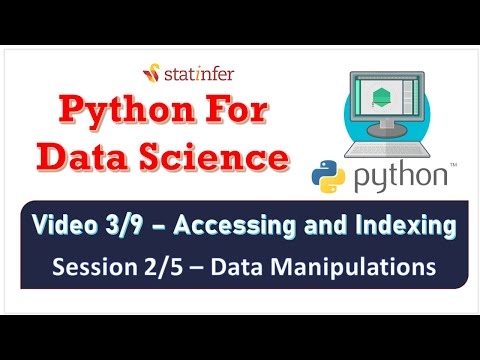

In [ ]:
YouTubeVideo('ECgU7A4KgOg', width=500, height=300)
# https://youtu.be/ECgU7A4KgOg 



we often need to access a particular row or a column in the dataframe, and even a subset of the dataframe.
To do all this we need to understand how the location of each element can be accessed. 

In pandas it's done using the Indexing.

Index is actually a third main Object type in pandas, which helps us with the address of the observations in both pandas series and the DataFrame.

In [ ]:
titanic.index

In [ ]:
#Here we can see that the index is one of the core object type of pandas.
type(titanic.index)

## Accessing a Column

We have two ways to access a column
1. `df.column_name`
2. `df['column_name']`

The first way: Shows that the `column_name` is an attribute of our dataframe.

The second way: is similar to accessing a `value` using `key` in a `python dictionary`.

**Note:**
* 2nd option is best practice, because if the column name has `space` or `.` it causes problem.
* another reason to use the second option is that the name of the column may clash with the datframe attribute.

In [ ]:
# titanic.Age
titanic['Age']

In [ ]:
# Acessing multiple columns
titanic[['Survived', 'Age']]

## Accessing Rows
Using the direct index number in `[]` doesn't work to access a single row, but does work if we have to select a range.

In [ ]:
#throws error
# titanic[[5]]
# titanic[5]

In [ ]:
# but we can access range of rows.
# titanic[0:5] # from 0th index to one before 5th
# titanic[4:6] # shows only the 4th index number
titanic[:-5] # till (n-5)th index

What if we need to access just one row and do 
## Pandas Indexers

1. `df.loc[row_index_names, column_names]` : **label based indexing**; Access both row  and column by names
2. `df.iloc[row_index_numbers, column_numbers]` : **number/location based indexing**; Access both row and columns with the number. 

* `df.ix[row_index_number, column_names]` : **deprecated**

### df.loc[ ]
when Row indexing is based on a unique value column

In [ ]:
titanic.loc[5:8, 'Survived':'Parch']

### pd.iloc[ ]

Both row and column indexers should be position based numbers.

In [ ]:
titanic.head(10)

In [ ]:
# Accessing a single row data
titanic.iloc[5]

In [ ]:
titanic.head()

In [ ]:
titanic.iloc[5:8, 1:8]

### ~pd.ix[ ]~

Utilizes a mixture of both `pd.loc[]` and `pd.iloc[]`

Rows can be accessed by position based numbers and columns with names.

**NOTE**: Please do not get into the habit of using `pd.ix[]` as it is going to be depreciated in next pandas versions.

In [ ]:
#titanic.ix[5:8, 'Survived':'Parch']

# 3.Conditional Filtering

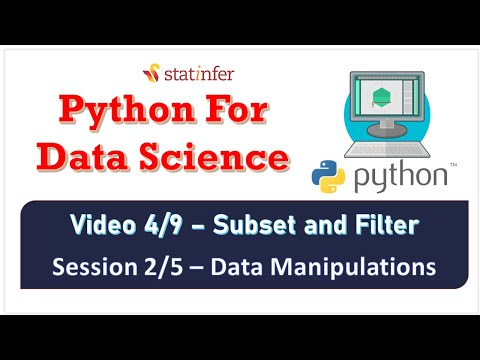

In [ ]:
YouTubeVideo('8f_SEUUJ4Js', width=500, height=300)
# https://youtu.be/8f_SEUUJ4Js 

**Conditional Mask:**

We first create a conditional mask and that mask can be passes as indexer in iloc

In [ ]:
# Find subset of female only
mask = titanic['Sex']=='female'
mask

In [ ]:
# we can now pass the mask to select rows
titanic[mask]
# titanic[mask].shape

In [ ]:
# to get columns, that doesn't match our mask.
titanic[~mask]

In [ ]:
# or we can directly pass the condition
titanic[titanic['Sex']=='female']

In [ ]:
# more boolians
mask = ((titanic['Sex']=='female') | (titanic['Age']<18)) & (titanic.Pclass == 1)
# titanic[mask]
titanic[mask].shape

### Mixing it up with loc: both row and columns

In [ ]:
titanic.loc[mask, ['Fare', 'Pclass']]

### using .isin() as filter condition

In [ ]:
mask = titanic['Embarked'].isin(['C', 'Q'])
titanic.loc[mask]

### using strings operations

In [ ]:
mask = titanic['Name'].str.contains('Rice')
titanic.loc[mask]

# 4.Manipulation

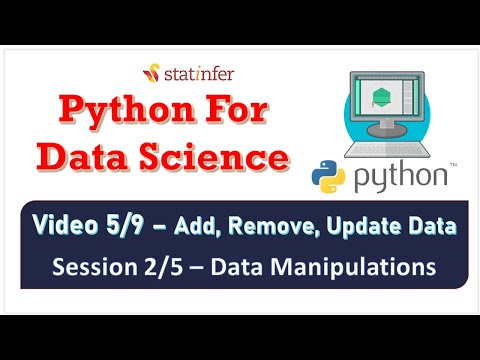

In [ ]:
YouTubeVideo('9Ld4Y0Bqp6o', width=500, height=300)
# https://youtu.be/9Ld4Y0Bqp6o 

## Modifying DataFrames : Update || Add || Remove

First we shall create a copy dataframe and keep the original dataframe safe.

In [ ]:
titanic_original = titanic.copy()

## 4.1 Modifying the column names

In [ ]:
titanic.columns

In [ ]:
# we can just assign the column names with a list of all the columns in correct order
titanic.columns = ['PassengerId', 'Survived', 'Passenger Class',
                   'Name', 'Sex', 'Age', 'Sibling Spouse',
                   'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [ ]:
titanic.columns

`Passenger Class` using a space in the name of the column is a bad idea.
Because the `df.Passenger Class` will not work. 

We should keep the column names in such a way that we do not have space or any special characters in the column name.

In [ ]:
# Changing the names of particular column(s)
titanic.rename(columns = {'Passenger Class':'Pclass', 'Sibling Spouse':'SibSp'}, inplace=True)

#.rename requires inplace=True to admit the changes

## 4.2 Updating Row-wise Elements
Basically how to update any element of the dataframe

1. **Never use Dictionary Style indexing to change the values**
2. To remember the Dictionary Style way was: `df[index_mask][list(columns)]`


* let's try to change the Pclass of the **0th row** where name is **Braund, Mr. Owen Harris**

In [ ]:
titanic.head()

In [ ]:
mask = titanic['Name'] == 'Braund, Mr. Owen Harris'

titanic[mask]['Pclass'] = 2

In [ ]:
titanic.head()

Above we can see that Dictionary Style indexing to update values doesn't work because how pandas handle different kind of indexing.

### Updating Values

We have learned that to access a value from the dataframe using `.loc[]` and `.iloc[]`. We shall extend the new value assigninment using those functions.

#### updateing a whole observation

In [ ]:
titanic.head()

In [ ]:
# titanic.loc[4]
titanic.loc[4]

In [ ]:
titanic.loc[4] = [5, 1, 3, 'Ram Lal', 'male', 55.0, 0, 0, '373450', 8.05, 'NaN', 'S']

In [ ]:
titanic.head()

#### Updating selected elements

In [ ]:
titanic.head()

In [ ]:
titanic.loc[4, ['Survived', 'Name', 'Age']] = [0, 'Allen, Mr. William Henry', 35.0]
titanic.head()

## 4.3 Updating and Creating Columns : Add || Update

Let's try to create new columns

In [ ]:
# Adding a new column is super easy
titanic['Adult'] = 0
titanic.head()

In [ ]:
titanic['fare_head'] = titanic['Fare']/titanic['SibSp']
titanic.head()

# 5.Series Functions

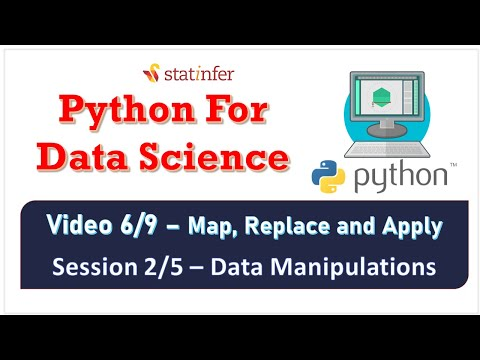

In [ ]:
YouTubeVideo('1N-acRJPk3Q', width=500, height=300)
# https://youtu.be/1N-acRJPk3Q

Every column is a series. To be able to update every value of the column based on a function or condition, we need to utilize a few pandas.Series functions.
1. map
2. replace
2. apply


## 5.1 map()
* `map` is a simple function that substitutes values of a series with other values.
* If a substitute value is not provided it converts the value as `NaN`

In [ ]:
titanic['Sex'].map({'male':0, 'female':1})

In [ ]:
titanic.head()

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})
titanic.head()

In [ ]:
# titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})
# titanic['Sex_1'] = titanic['Sex'].map({'male':0, 'female':1})

# titanic['Embarked'] = titanic['Embarked'].map({'C' = 'Cherbourg', 'S':'Southampton'})
titanic['Embarked_1'] = titanic['Embarked'].map({'C':'Cherbourg', 'S':'Southampton'})
# C = Cherbourg, Q = Queenstown, S = Southampton
titanic.head()

In [ ]:
#let's see a couple of more values
titanic.head(6)

## 5.2replace()

`replace` works exactly as `map`, but if no mapping is provided it leaves the original value.

In [ ]:
titanic['Embarked_2'] = titanic['Embarked'].replace({'C':'Cherbourg', 'S':'Southampton'})
titanic.head(6)

## 5.3apply()

* as the name suggests apply helps us applying a function on a column. 
* the fucnction can be standard python or pandas function or even a custom function.

In [ ]:
def lastname(x):
    # print(x.split(','))
    return x.split(',')[0]

lastname('Allen, Mr. William Henry')

In [ ]:
titanic['LastName'] = titanic['Name'].apply(lastname)
titanic.head()

In [ ]:
titanic['Name'].apply(lambda x: x.split(',')[0])

# 6.apply() on dataframe

In [ ]:
titanic_tmp = titanic.loc[:, ['Pclass', 'Age', 'SibSp', 'Fare']]

In [ ]:
titanic_tmp.head()

In [ ]:
titanic_tmp.apply(max)

## 6.1"axis" Understanding Axis

    Axis along which the function is applied:
        0 or ‘index’: apply function to each column.
        1 or ‘columns’: apply function to each row.

In [ ]:
titanic_tmp.apply(max, axis = 0)

In [ ]:
titanic_tmp.apply(max, axis = 1)

# 7 Groupby

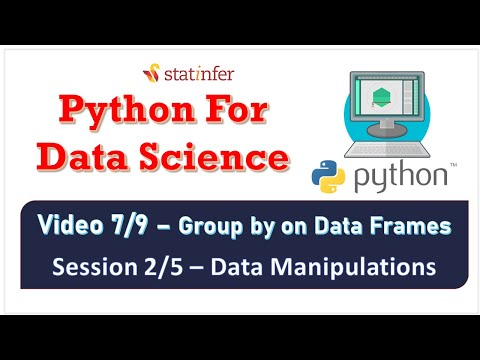

In [ ]:
YouTubeVideo('caZOcTaWEAg', width=500, height=300)
# https://youtu.be/caZOcTaWEAg



`"A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups."`

1. Split Object into Groups
2. Apply a function on elements of groups
3. Combine the results

Functions available for us:
1. sum()
2. mean()
3. size() # counting
4. agg([min,max]) **Can get super complicated, as a list of functions can be passed here**
5. count()

In [ ]:
# find the mean age of people with pclass == 1

titanic[titanic.Pclass == 1]['Age'].mean()

In [ ]:
#Create the groupby object
%%time
titanic.groupby('Pclass')

In [ ]:
%%time
titanic.groupby('Pclass').mean()

In [ ]:
titanic.groupby('Pclass').Survived.size()

In [ ]:
titanic.groupby('Pclass').Survived.sum()

In [ ]:
# titanic.groupby('Pclass').Age.agg([min, max])
titanic.groupby('Pclass').agg([min, max])

# 8.Merging two datasets

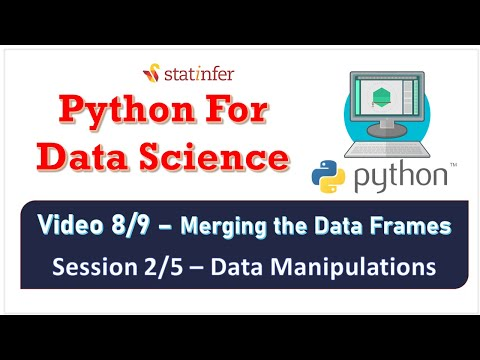

In [ ]:
YouTubeVideo('npZ72aFhmqU', width=500, height=300)
# https://youtu.be/npZ72aFhmqU


**how :**

* inner: use intersection of keys from both frames (SQL: inner join)
* outer: use union of keys from both frames (SQL: full outer join)
* left: use only keys from left frame (SQL: left outer join)
* right: use only keys from right frame (SQL: right outer join)




`pd.merge(dataframe1,dataframe2, on=<Key column>,how=<join type> )`

In [ ]:
orders1 = pd.read_csv('https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Python_Session2_Datasets/TV_Commercial_Slots_Analysis/orders.csv')
slots1 = pd.read_csv('https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Python_Session2_Datasets/TV_Commercial_Slots_Analysis/slots.csv')
print(orders1.shape)
print(slots1.shape)

In [ ]:
orders1.head()

In [ ]:
slots1.head()

In [ ]:
Order_Slot_Common = pd.merge(orders1, slots1, on='Unique_id', how='inner')
Order_Slot_Common.shape

In [ ]:
Order_Slots_union = pd.merge(orders1, slots1, on='Unique_id', how='outer')
Order_Slots_union.shape

In [ ]:
Slot_all_order_match = pd.merge(orders1, slots1, on='Unique_id', how='right')
Order_all_Slot_match = pd.merge(orders1, slots1, on='Unique_id', how='left')

---
---
# Useful Links and Details


### Next Session Link 
[Session-3 : Basic Statiatics with Python](https://colab.research.google.com/drive/15RG9irOwj_C4ktebSk4_hqdox2_nxoln?usp=sharing)


### Previous Session Link
[
Session-1 : Getting Started With Python ](https://colab.research.google.com/drive/1DsVgojvs98R8HPYJAwvSUmHqudt6lGzG#scrollTo=Vq9dZcrRq00m)

### Our Full Course Details 

[Enrol Now](https://statinfer.com/course/machine-learning-with-python-course-in-india/)

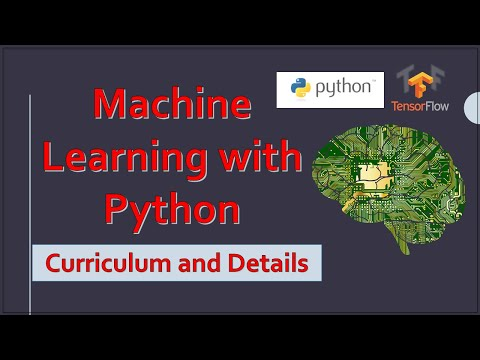

In [ ]:
YouTubeVideo('v8WvvX5DZi0', width=500, height=300)
# https://youtu.be/v8WvvX5DZi0 

[Enrol Now](https://statinfer.com/course/machine-learning-with-python-course-in-india/)

